In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


* Load Data
* Summary (Mean, Median, Standard deviation)
* Outliers
* cohen effect size
* Corelation
    *  Heatmap
    *  Person corelation
    *  Spermans Rank corelation
* Hypothesis Testing
    *  Null Hypothesis
    *  p value
* Z score   
* [Chi-square](https://www.kaggle.com/code/shahhemali/wisconsin-chi2-wald-test-evalut)
* Cross-Validation

# Load Data

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
 
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [5]:
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [6]:
data.head

<bound method NDFrame.head of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760

In [7]:
data.shape

(569, 31)

In [8]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
m = data[data["diagnosis"] == "M"]
b = data[data["diagnosis"] == "B"]


# # SUMMARY function
* Mean
* Variance: spread of distribution
* Standart deviation square root of variance
here is the **summary statistics of bening tumor radiance mean**

In [10]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
standart deviation (std):  1.7805116461410393
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


In [11]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
print("mean: ",data_malignant.radius_mean.mean())
print("variance: ",data_malignant.radius_mean.var())
print("standart deviation (std): ",data_malignant.radius_mean.std())
print("describe method: ",data_malignant.radius_mean.describe())

mean:  17.462830188679245
variance:  10.26543081462935
standart deviation (std):  3.203971100779367
describe method:  count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64


In [31]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
print("mean: ",data.radius_mean.mean())
print("variance: ",data.radius_mean.var())
print("standart deviation (std): ",data.radius_mean.std())
print("describe method: ",data.radius_mean.describe())

mean:  14.127291739894552
variance:  12.418920129526722
standart deviation (std):  3.5240488262120775
describe method:  count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64


# t-test# 

In [32]:
import pandas as pd
# Create a DataFrame for easier manipulation
df = pd.DataFrame(data, columns=data.radius_mean)
df['diagnosis'] = data.diagnosis  # Add diagnosis (target) column

# Separate the dataset into benign and malignant groups
benign = df[df['diagnosis'] == 0]
malignant = df[df['diagnosis'] == 1]


In [37]:
from scipy.stats import ttest_ind
# Perform a t-test for each feature
t_test_results = {}
for column in data.radius_mean:
    t_stat, p_value = ttest_ind(benign[column], malignant[column], equal_var=False)  # Welch's t-test
    t_test_results[column] = p_value

In [38]:
# Convert the t-test results into a DataFrame for better visualization
t_test_df = pd.DataFrame(list(t_test_results.items()), columns=['Feature', 'p-value'])


In [39]:
# Display the p-values
print(t_test_df)

     Feature     p-value
0      17.99  [nan, nan]
1      20.57         NaN
2      19.69         NaN
3      11.42         NaN
4      20.29         NaN
..       ...         ...
451    21.56         NaN
452    20.13         NaN
453    16.60         NaN
454    20.60         NaN
455     7.76         NaN

[456 rows x 2 columns]


#  Outliers
check outliers for bening tumor distribution for feature radius mean
steps:
1. calculate first quartile (Q1)(25%),
2. find IQR(inter quartile range) = Q3-Q1
3. compute Q1 - 1.5IQR and Q3 + 1.5IQR
Anything outside this range is an outlier

In [10]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("For the feature : radius_mean")
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

For the feature : radius_mean
Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


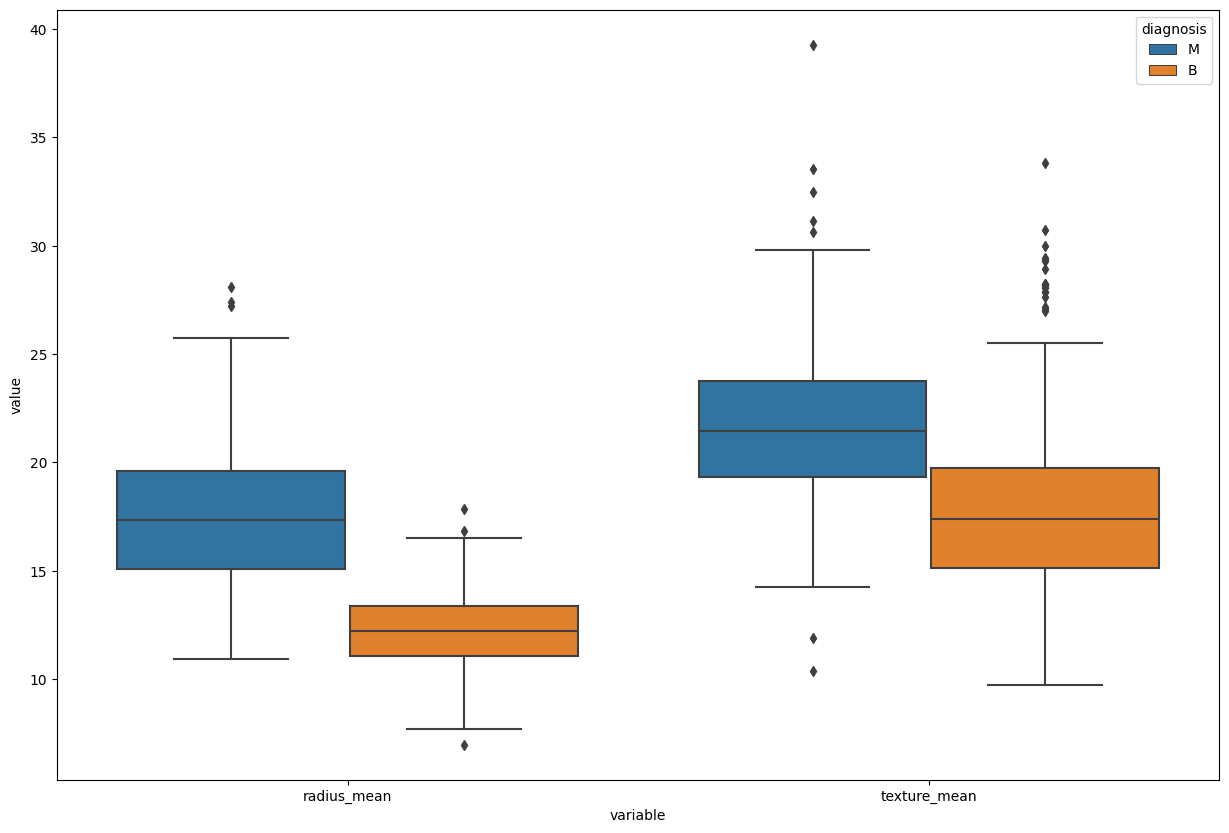

In [11]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

# #cohen effect size
* gives indication that its practically significant or not 
* comparing two means
* if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size.
* compare size of the effect between bening radius mean and malignant radius mean
* Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other


In [12]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041414


# # Corelation
- relationship between two variables
- **if no relationship between features means faster learning of algorithms and higher interpritability**
# -Heatmap
* numbers range is -1 to 1
* 1 means- variables are positively corelated with each other
* 0 means- no corelation
* -1 means- negatively corelated


In [13]:
data1 = data.drop(['diagnosis'],axis = 1)

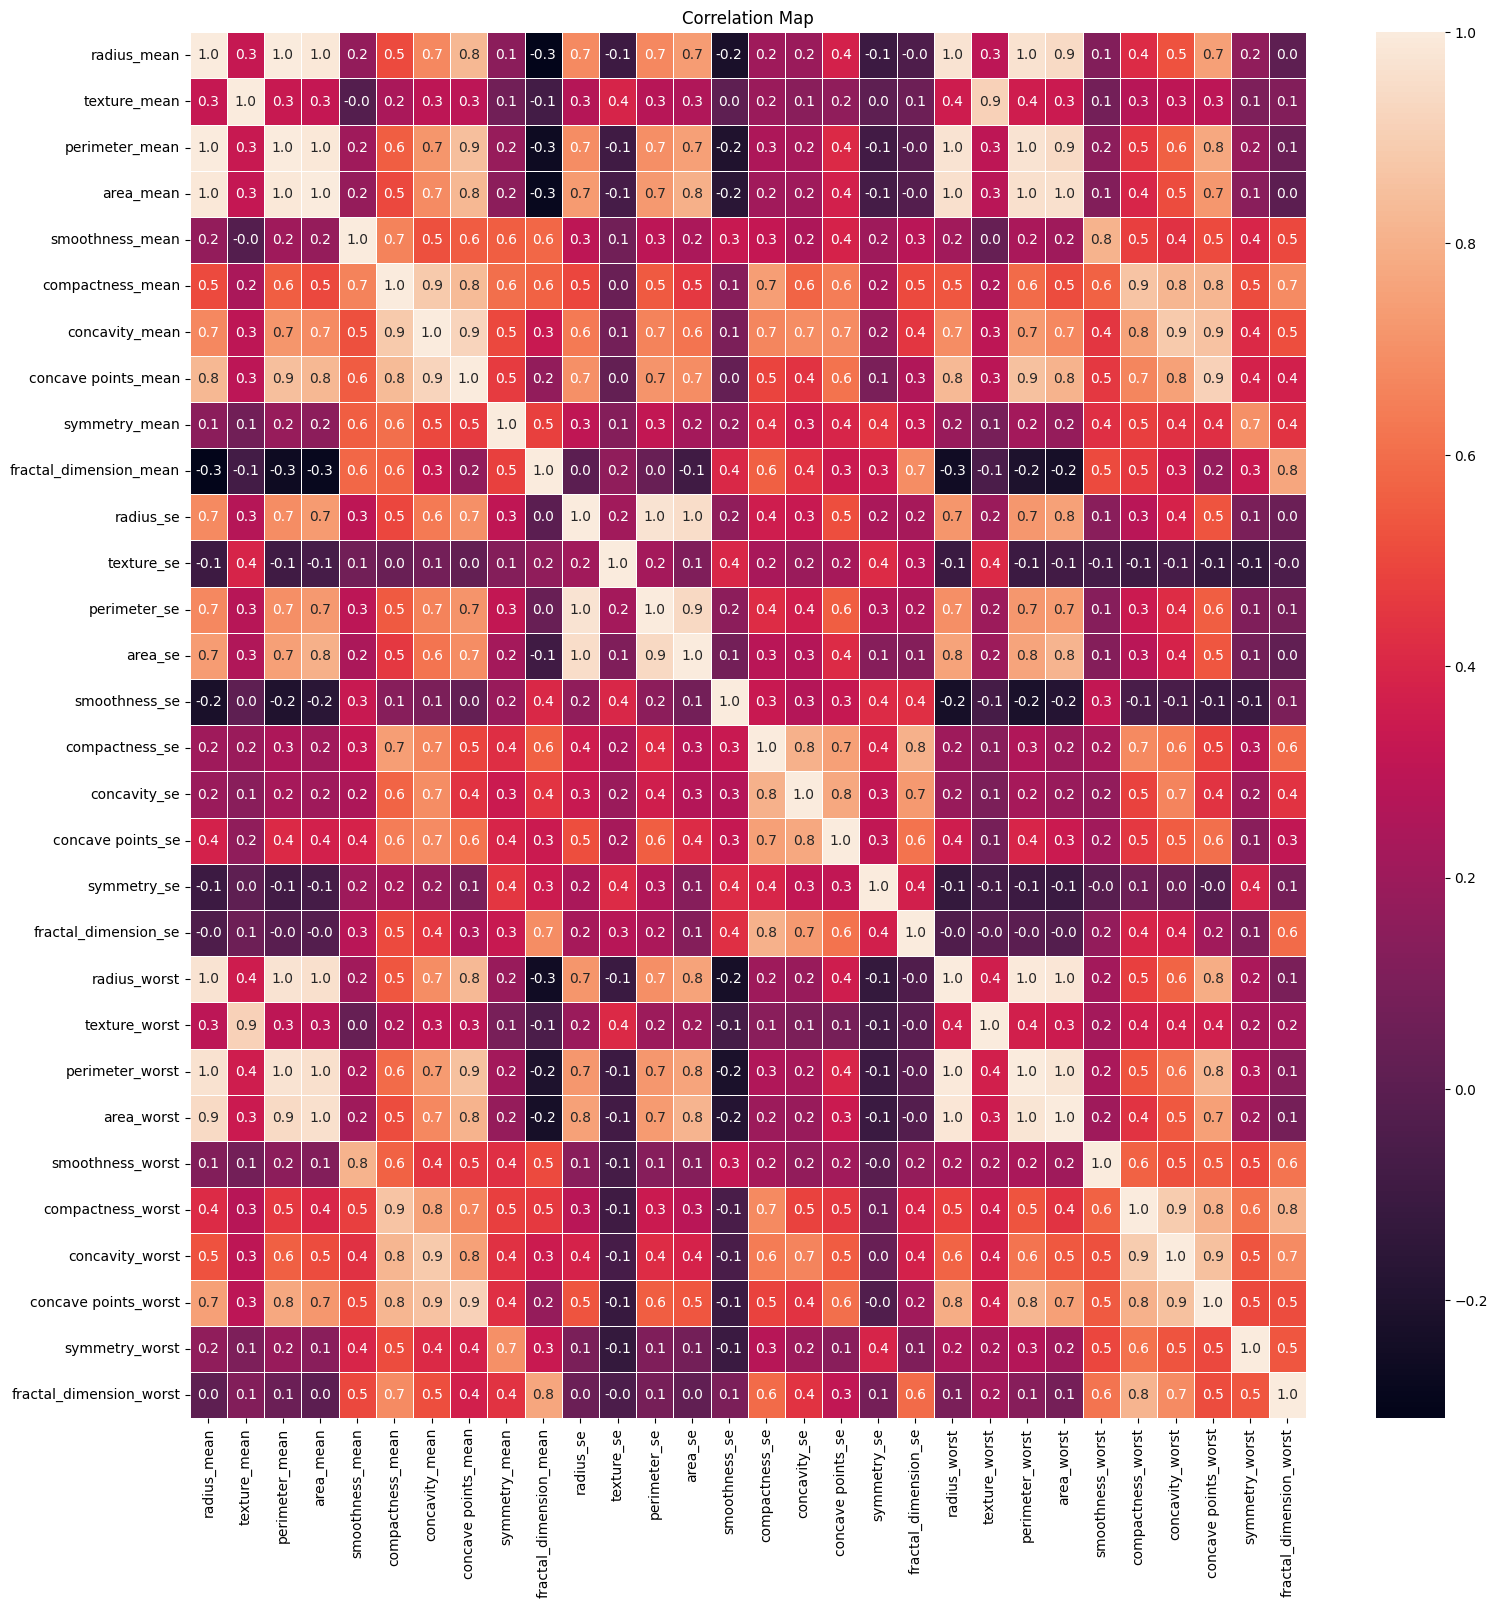

In [14]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

# # Pearson corelation
* pearson corelation= division of covariance by standard deviation of variables
  (cov(A,B)/(std(A)*std(B)))
    * covariance
        *  a measure of the relationship between two random variables and to what extent, they change together.  
        * Covariance is zero if they are orthogonal.
        
* pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high        

In [15]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566126


# #Spearman's Rank correlation: 
* Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
* To compute spearman's correlation need to compute rank of each value
* Spearman's correlation is little higher than pearson correlation
        * If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
        * Pearson correlation can be affected by outliers.
        * Spearman's correlation is more robust.


In [16]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


# # Hypothesis Testing
steps:
*     *  Define Null Hypothesis
*     *  Gather data & conduct statistical test   
*     *  Determine Null hypothesis should be rejected or not   
for our problem steps:
     *   Quantify the size of the apparent effect by choosing a test statistic. Natural choice for the test statistic is the difference in means between two groups.
     *   define null hypothesis assumption that the apparent effect is not real.
     *   compute p-value that is probablity of seeing the apparent effect if the null hypothesis is true 
     *   If p value is less than or equal to a threshold, we reject null hypothesis.
     
*  In our example:
To learn that radius mean and area mean related with each other? null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.
Now we need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related. (actually we know it from our previous experiences)
lets find p-value (probability value)     

In [17]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


# # Chi-square

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [19]:
df=data

df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 0, 1)
X = df.drop(['diagnosis'], axis = 1)
Y = df['diagnosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [22]:
chi2_features = SelectKBest(chi2, k = 5)
X_train_features = chi2_features.fit_transform(X_train, y_train)
X_test_features = chi2_features.transform(X_test)
print('Number of Original Features:', X_train.shape[1])
print('Selected Number of Features:', X_train_features.shape[1])

Number of Original Features: 30
Selected Number of Features: 5


In [23]:
# These are chi-square score values , higher the value higher the importance of the target variable
chi_score=chi2(X,Y)
print(chi_score)

(array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
       1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
       2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
       2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
       1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
       4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
       3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
       1.29886140e+00, 2.31522407e-01]), array([8.01397628e-060, 3.32292194e-022, 0.00000000e+000, 0.00000000e+000,
       6.98631644e-001, 2.01012999e-002, 9.00175712e-006, 1.16563638e-003,
       6.11926026e-001, 9.93122221e-001, 3.89553429e-009, 9.21168192e-001,
       1.94877489e-056, 0.00000000e+000, 9.54425121e-001, 4.33366115e-001,
       3.06726812e-001, 5.80621137e-001, 9.92847410e-001, 9.36379753e-001,
       6.11324751e-109, 7.89668299e-040, 0.00000000e+000, 0.00000000e+000,
       5.28

<Axes: >

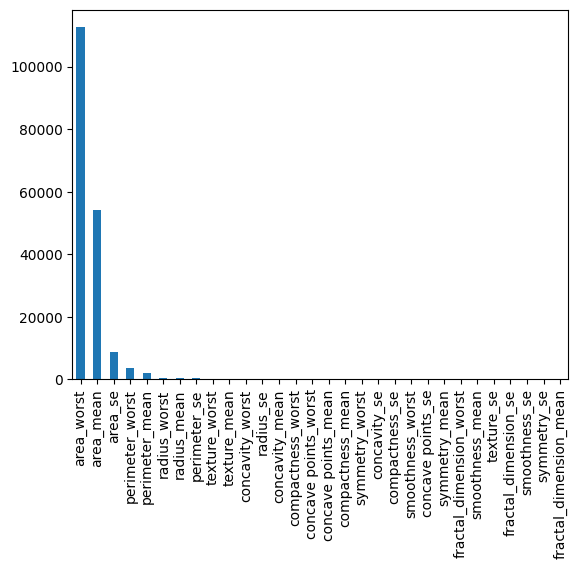

In [24]:
chi_values = pd.Series(chi_score[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()


In [28]:
def metrics(X,CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Sensitivity=tp/(tp+fn)
    Specificity=tn/(tn+fp)
    Precision=tp/(tp+fp)
    F_measure=2*tp/(2*tp+fp+fn)
    print('Accuracy=%.3f'%Accuracy)
    print('Sensitivity=%.3f'%Sensitivity) # as the same as recall
    print('Specificity=%.3f'%Specificity)
    print('Precision=%.3f'%Precision)
    print('F-measure=%.3f'%F_measure)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.97      1.00      0.99        73

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy=0.982
Sensitivity=1.000
Specificity=0.951
Precision=0.973
F-measure=0.986


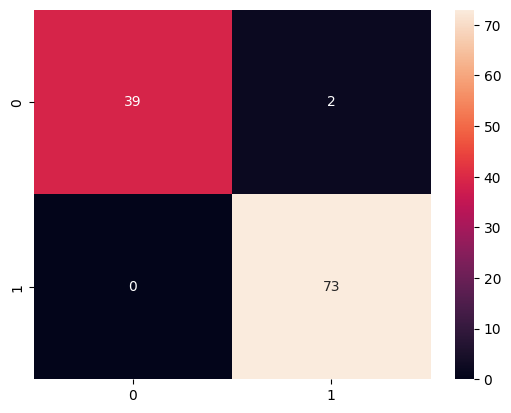

In [29]:
# Original data model performance
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X_train, y_train)
lg.score(X_test, y_test)

y_pred=lg.predict(X_test)
print(classification_report(y_test, y_pred))

lg_metrics = metrics(X_test,lg)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [26]:
lg.score(X_train, y_train)

0.9560439560439561

In [27]:
# Chi - Square data Model performance
lg_chi_square = LogisticRegression().fit(X_train_features, y_train)
lg_chi_square.score(X_test_features, y_test)


0.9649122807017544